<a href="https://colab.research.google.com/github/DarioHHH/Ejemplo/blob/main/Bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Description
See, fork, and run a random forest benchmark model through Kaggle Scripts

You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

Data Fields

datetime - hourly date + timestamp
season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use("fivethirtyeight")

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/pfernandez-sanofi/ml_tutorials/main/DATA/forecasting_exercise.csv')
df.head()

,instant,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


In [32]:
df.shape

(17379, 11)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   hr          17379 non-null  int64  
 3   weathersit  17279 non-null  object 
 4   temp        17280 non-null  float64
 5   atemp       17279 non-null  float64
 6   hum         17279 non-null  float64
 7   windspeed   17279 non-null  float64
 8   casual      17379 non-null  int64  
 9   registered  17379 non-null  int64  
 10  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.5+ MB


Data Preparing

In [34]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['year'] = df['dteday'].dt.year
df['quarter'] = df['dteday'].dt.quarter
df['month'] = df['dteday'].dt.month
df['day_of_week'] = df['dteday'].dt.day_name()
df['hour'] = df['dteday'].dt.hour

df['weathersit'] = df['weathersit'].map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy',
                                   2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                   3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                   4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})
df.head()

,instant,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,quarter,month,day_of_week,hour
0,1,2011-01-01,0,NaN,0.24,0.2879,0.81,0.0,3,13,16,2011,1,1,Saturday,0
1,2,2011-01-01,1,NaN,0.22,0.2727,0.80,0.0,8,32,40,2011,1,1,Saturday,0
2,3,2011-01-01,2,NaN,0.22,0.2727,0.80,0.0,5,27,32,2011,1,1,Saturday,0
3,4,2011-01-01,3,NaN,0.24,0.2879,0.75,0.0,3,10,13,2011,1,1,Saturday,0
4,5,2011-01-01,4,NaN,0.24,0.2879,0.75,0.0,0,1,1,2011,1,1,Saturday,0


Bike Shaing count by Year

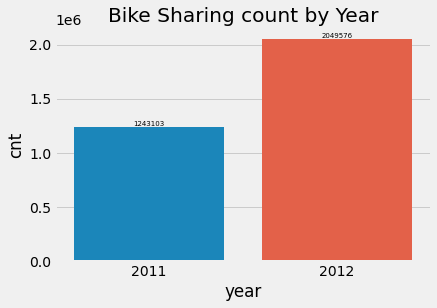

In [37]:
year_count = df.groupby('year')['cnt'].sum().reset_index()
g = sns.barplot(data=year_count,x='year',y='cnt')
for v in year_count.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.cnt+1e4,s=str(v.cnt), size=7, ha="center")
plt.title('Bike Sharing count by Year')
plt.show()

Bike Shaing count by Month and Year

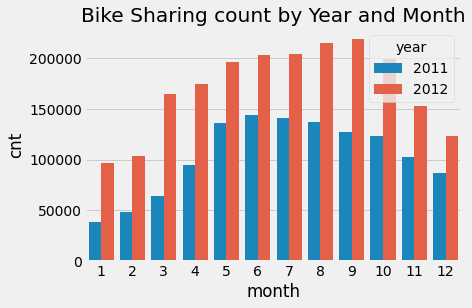

In [38]:
year_month_count = df.groupby(['year','month'])['cnt'].sum().reset_index()
sns.barplot(data=year_month_count,x='month',y='cnt',hue='year')
plt.title('Bike Sharing count by Year and Month')
plt.show()

Bike Shaing count by Day and Year

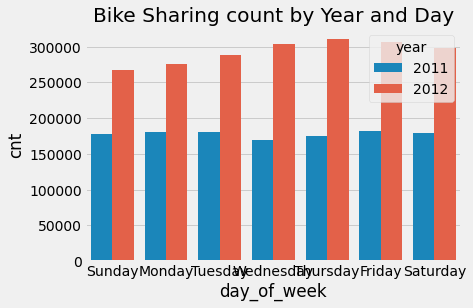

In [39]:
year_day_count = df.groupby(['year','day_of_week'])['cnt'].sum().reset_index()
order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.barplot(data=year_day_count,x='day_of_week',y='cnt',hue='year',order=order)
plt.title('Bike Sharing count by Year and Day')
plt.show()

Bike Shaing count by Hour and Year

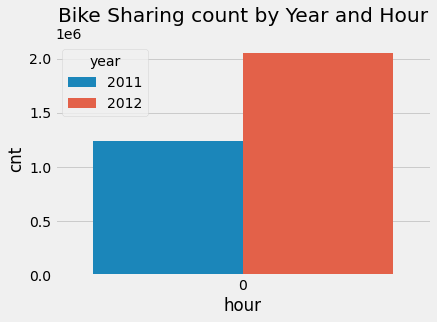

In [40]:
year_hour_count = df.groupby(['year','hour'])['cnt'].sum().reset_index()
sns.barplot(data=year_hour_count,x='hour',y='cnt',hue='year')
plt.title('Bike Sharing count by Year and Hour')
plt.show()

Bike Shaing count by Weather¶

In [ ]:
weather_count = df.groupby('weather')['cnt'].sum().reset_index()
g = sns.barplot(data=weather_count,x='weather',y='cnt')
for v in weather_count.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+1e4,s=str(v.count), size=7, ha="center")
plt.title('Bike Sharing count by Weather')
plt.xticks(rotation=90)
plt.show()